In [1]:
from domino.evaluate.evaluate import evaluate_sdms, run_sdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

task: plot_evaluate_sdms, run_id=4346


  2%|▏         | 10/515 [00:00<00:05, 90.53it/s]

Preparing dataframe...


100%|██████████| 515/515 [00:05<00:00, 91.56it/s]


Plotting...


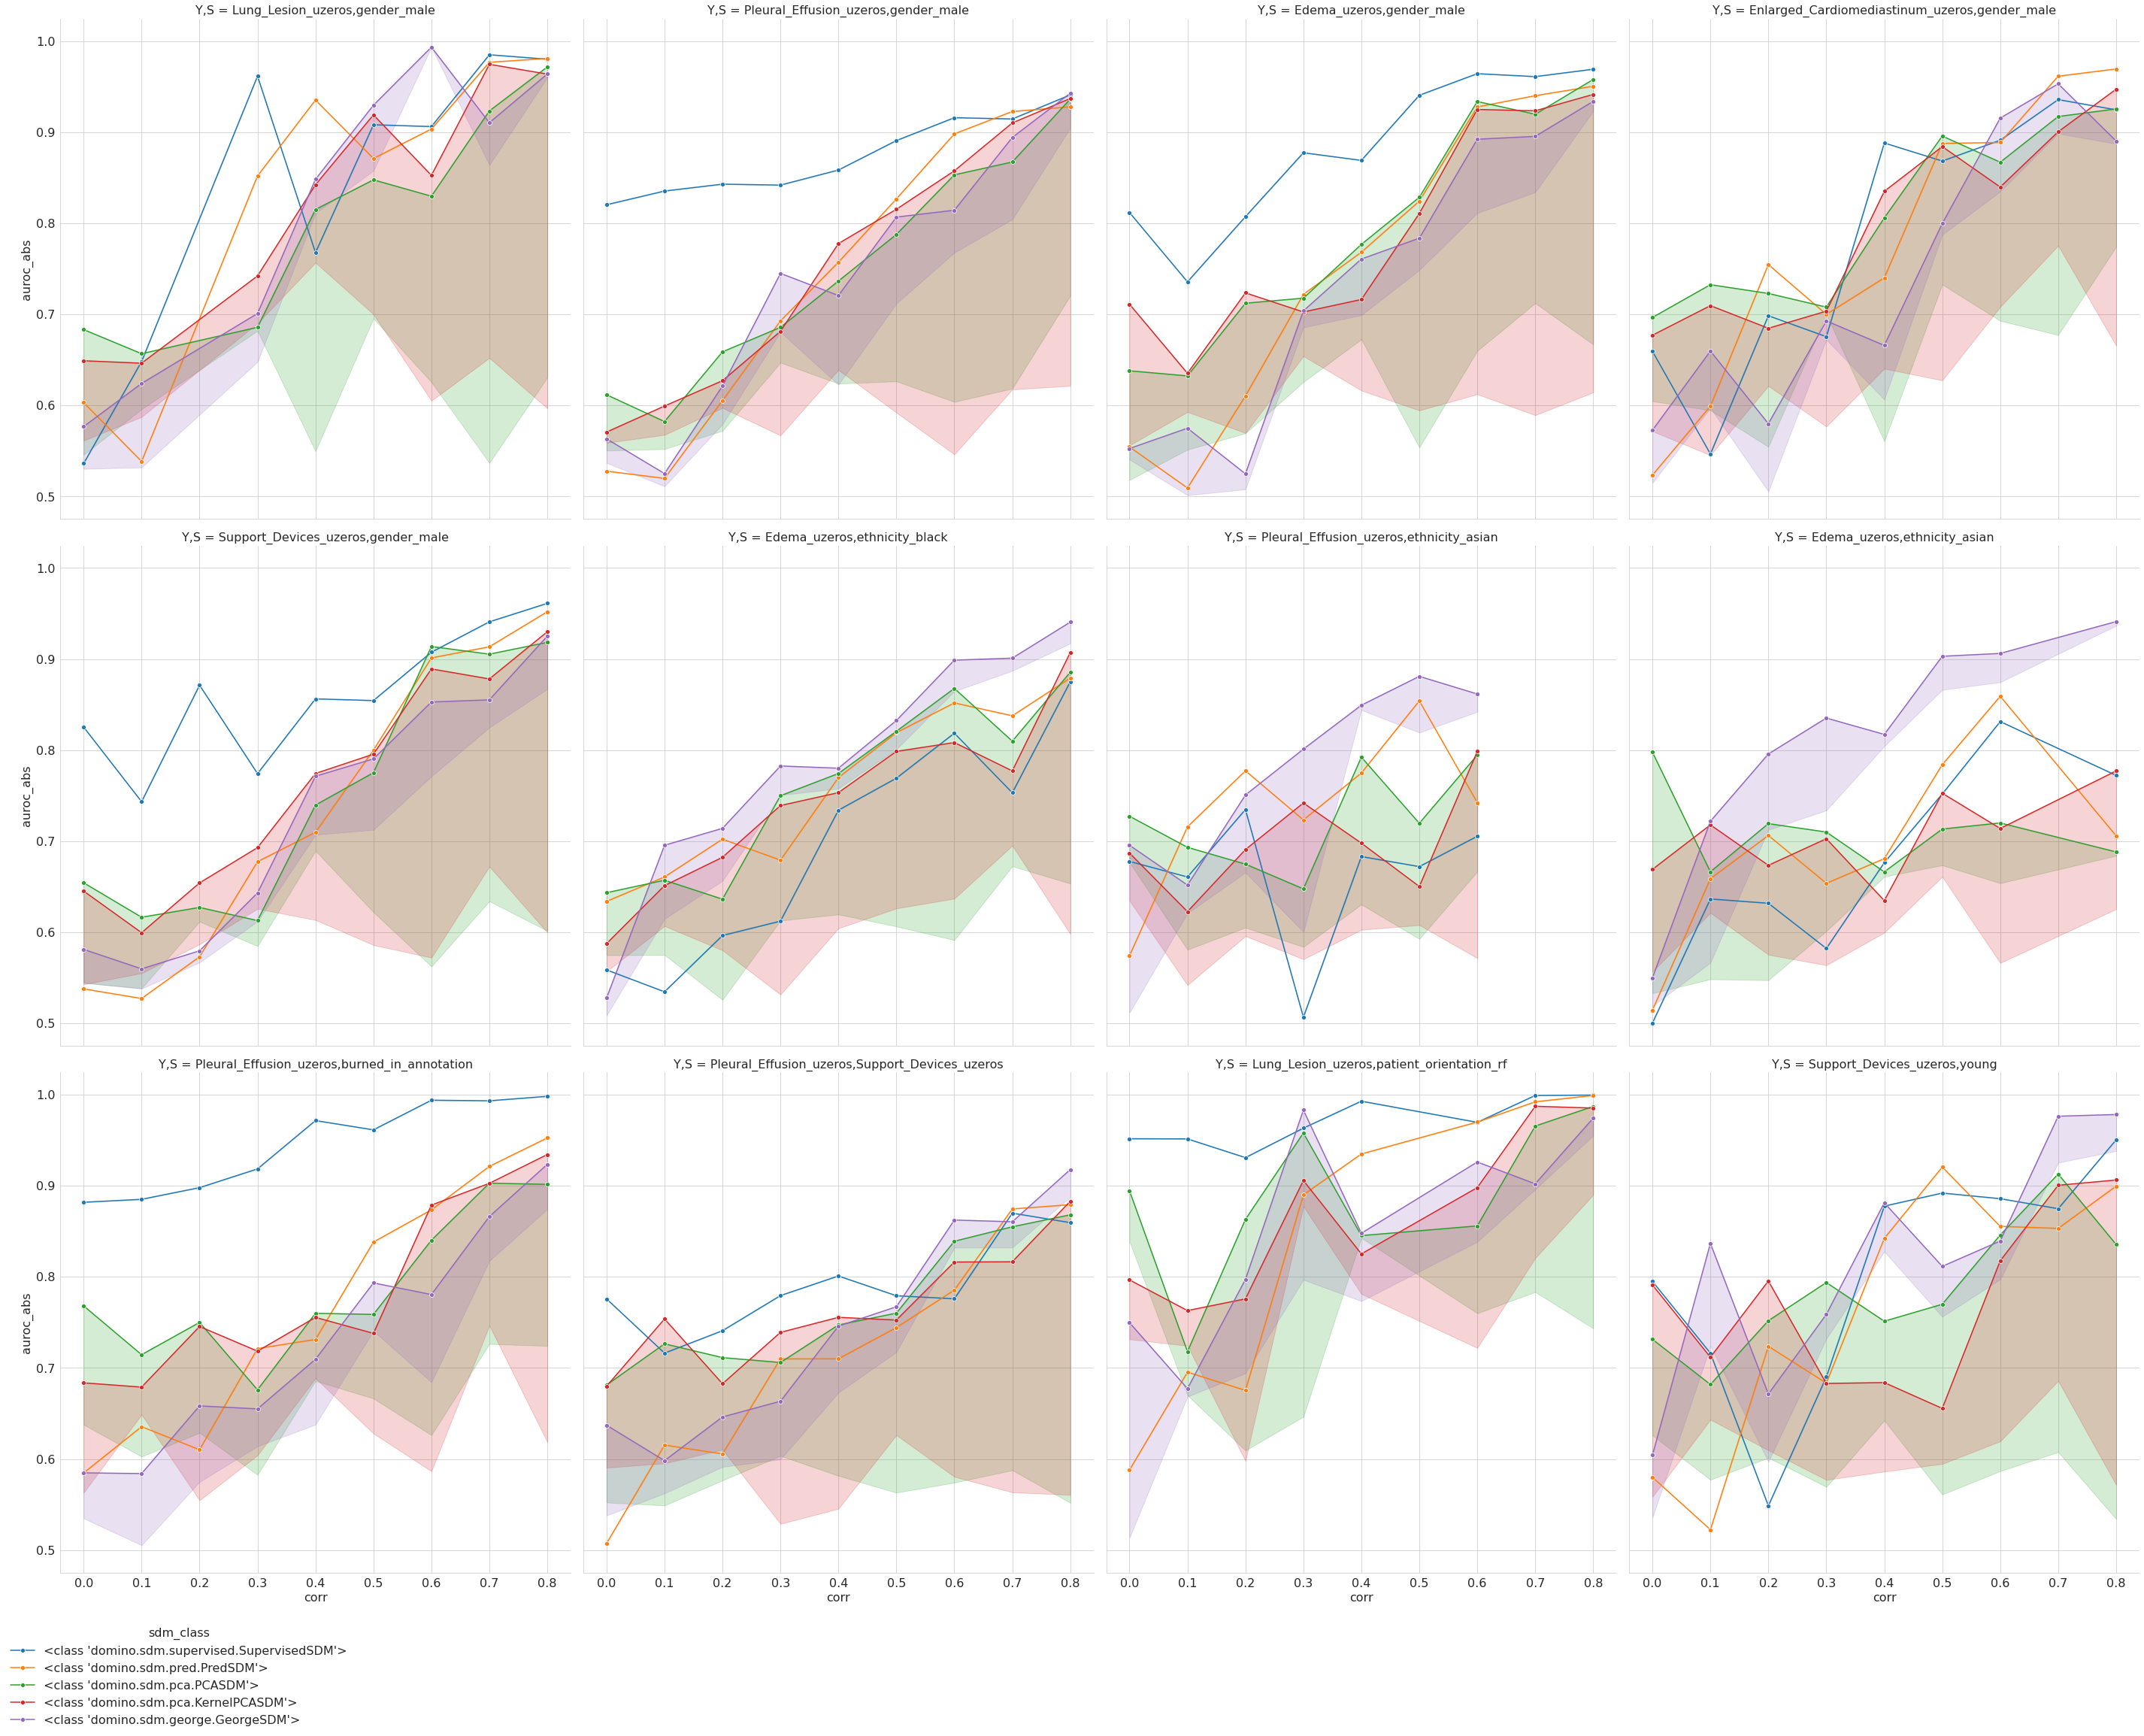

In [2]:
from domino.evaluate.evaluate import evaluate_sdms, run_sdm
from domino.vis.evaluate import plot_evaluate_sdms
out = plot_evaluate_sdms([evaluate_sdms.out(4229).load(), evaluate_sdms.out(3812).load()])

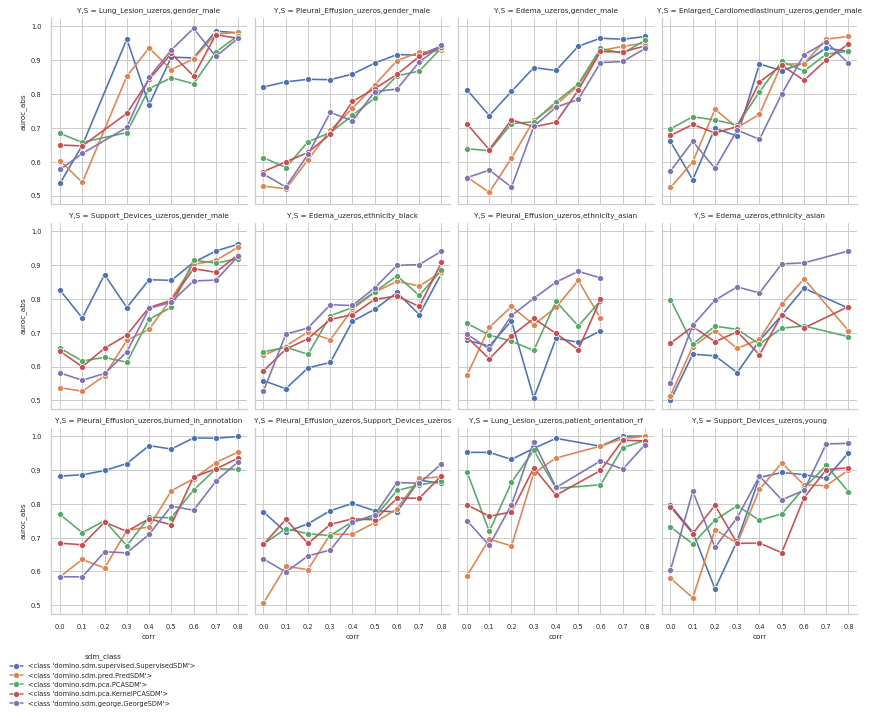

In [14]:
import seaborn as sns
sns.set_style("whitegrid", rc={"font_scale": 6})
g = sns.FacetGrid(plot_df, col="Y,S", hue="sdm_class", col_wrap=4, legend_out=True, height=3)
g = g.map(sns.lineplot, "corr", "auroc_abs", marker="o", estimator="max", ci=False, label="small")
g.add_legend(bbox_to_anchor=(0, 0), loc='upper left')

In [35]:
from sklearn.metrics import roc_auc_score
df = pd.concat([evaluate_sdms.out(4229).load(), evaluate_sdms.out(3812).load()])
rows = []
for _, row in df.iterrows():
    for slice_idx in range(5):
        dp = run_sdm.out(row.run_id).load()
        rows.append(
            {
                "sdm_class": row.sdm_class,
                "target": row.target,
                "correlate": row.correlate,
                "corr": row["corr"],
                "auroc":roc_auc_score(dp[row.correlate], dp["slices"].data[:, slice_idx]),
            }
        )
plot_df = pd.DataFrame(rows)

plot_df["auroc_abs"] = np.maximum(plot_df["auroc"], 1 - plot_df["auroc"] )


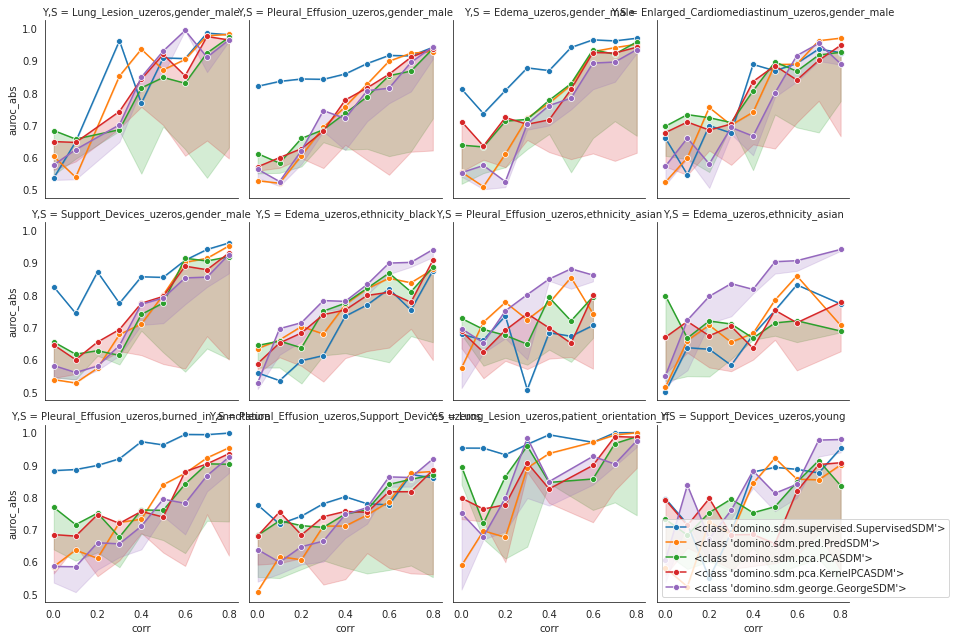

In [44]:
import seaborn as sns
sns.set_style("white")
plot_df["Y,S"] = plot_df["target"] + "," + plot_df["correlate"]
plot_df["method"] = plot_df["sdm_class"].astype(str)
g = sns.FacetGrid(
    plot_df,
    col="Y,S",
    hue="method",
    col_wrap=4
)
g.map(sns.lineplot, "corr", "auroc_abs", marker="o", estimator="max")
plt.legend()

In [15]:
df["Y,S"] = df["target"] + "," + df["correlate"]